# TED TALKS SCRAPING PROJECT

Betuel Oezturan 
<br>
01/943905
<br>
Universität Konstanz

For my final project, I chose www.ted.com to scrape which has hundreds of inspiring videos on several topics. 

In [ ]:
from IPython.core.display import display, HTML
display(HTML('http://www.ted.com/talks'))

First of all, I need to check if ted.com permits web-scraping. I checked terms of condition and robots.txt file. Apart from those mentiond as disallow:/ on robots.txt page, ted can be scraped for non-commercial purposes. 

In [1]:
#display robots.txt 
from IPython.core.display import display, HTML
display(HTML('https://www.ted.com/robots.txt'))

In this notebook, 
1. I will firstly parse ted video links. Ted has around 3000 videos which the oldest one is from June 2006. I will store their links in my computer as 'ted_talks.csv' file for not to run same code everytime. The structure of the links are as follows: 'https://www.ted.com/name_of_the_talk' . We will use this structure to parse video links because they are not stored as full url links on html version of the website. 
<br>
<br>
2. I will show step by step how I scrape one video as an example. Afterwards, I will create a function code to scrape all videos.   
<br>
3. And then, I will visit every individual video page, collect the important data with my already defined 'get_talk_content' function and store them as 'ted_talks_data.csv' on my computer to access later. 
<br>
<br>
4. We will discuss what we can do with the stored data

<br>
The purpose of the project is to store important data about ted talks in a structure ready to be used for any research related to the TED-talks

Let's look at 'Why you should read Don Quixote' talk as an example:
<br>In the video page you can see: 
<br>-title of the video
<br>-name of the speaker
<br>-number of views
<br>-description of the video
<br>-duration of the talk
<br>-related talks
<br>in an additional url you can also access transcripts of the talks

In [203]:
#you can open the mentioned talk by running the code  below
import webbrowser
webbrowser.open('https://www.ted.com/talks/ilan_stavans_why_should_you_read_don_quixote')

True

### 1. Getting Links for All videos

In [7]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib
from urllib.request import urlopen
import time
import requests
import re
from IPython.display import clear_output


Firstly, try to write a code that will work for parsing talk links on one page: When you open 'https://www.ted.com/talks' page, it has several links embedded in the code such as 'watch', 'discover','participate' etc. sections. What we want to have is the links that will direct us to the talk links. We will run a code for one page of talks archive, that will parse only talk links and parse them once for us. 

In [8]:
base = 'https://www.ted.com/talks?page={}'

In [9]:
paginator = list(range(0, 40))

In [10]:
toget = base.format(str(paginator[6]))
html = requests.get(toget)
soup = BeautifulSoup(html.text, 'html5lib')

In [11]:
all_url=soup.select('.ga-link') 
#using 'selectorgadget' we find every content that has .ga-link attribute which means links to anything on the page

In [12]:
talks_meta=soup.find_all(attrs={"data-ga-context":"talks"}) #we parsed only links that has 'talks' attribute

In [13]:
talks=[]
for talk in talks_meta:
    talks.append(talk['href'])
talks=list(set(talks)) # set function eliminates duplicates
talks[:3]
# we need to append 'www.ted.com on the beginning to open the pages, but we will do it on our main code'

['/talks/darieth_chisolm_let_s_call_revenge_porn_what_it_is_digital_domestic_violence',
 '/talks/alexis_jones_redefining_manhood_one_locker_room_talk_at_a_time',
 '/talks/congrui_jin_what_if_cracks_in_concrete_could_fix_themselves']

Now we know how to parse talk links, we can define a function to do it for every page. 

In [14]:
def get_talk_links(input_range = range(0, 90)): 
#range of pages, if you change 90 to 15, the code will parse until 14th page
#so you will have less TED videos scraped at the end
    
    all_links = []
    base = base = 'https://www.ted.com/talks?page={}'
    for i in input_range: 
        time.sleep(2) # wait 2 seconds
        clear_output(wait=True) # clear output
        url = base.format(str(i))
        html = requests.get(url)
        while html.status_code == 429: # wait and retry in case of error
            print('Error. Too many requests. Waiting a bit..')
            time.sleep(15)
            html = requests.get(url)
        soup =  BeautifulSoup(html.text, 'html5lib')
        talks_meta = soup.find_all(attrs={"data-ga-context":"talks"})
        
        print("Current page: {}, Status code: {}, Links: {}".format(url, str(html.status_code),
                                                               str(len(talks))))

            
        for talk in talks_meta:
            all_links.append('https://www.ted.com'+talk['href'])
            
        all_links=list(set(all_links))
        
    return(all_links)


In [15]:
talk_data=get_talk_links()

Current page: https://www.ted.com/talks?page=89, Status code: 200, Links: 36


In [17]:
%cd "/Users/betulraylaz/Documents/data-hands-on" 
#change it to your local repository
#save the urls as csv file, so we will not have to scrape them everytime we need

with open('ted_talks.csv', 'w',encoding = 'utf-8') as f:
     for talk in talk_data:
        f.write(talk + '\n')


/Users/betulraylaz/Documents/data-hands-on


In [21]:
%cd "/Users/betulraylaz/Documents/data-hands-on" 
#read them into python
with open('ted_talks.csv', 'r', encoding = 'utf-8') as f:
    talk_link_csv = f.read().split('\n')[:-1] # split
    



/Users/betulraylaz/Documents/data-hands-on


In [22]:
talk_link_csv[4]
#Yes, we have them saved on our computer

'https://www.ted.com/talks/rose_eveleth_how_do_we_smell'

### 2. Scraping one video detail

In [23]:
test = talk_link_csv[7] # you can choose any video as an example
html = requests.get(test)
soup = BeautifulSoup(html.text, 'html5lib')

In [25]:
#video name as a string
title=soup.title.string
type(title)
title

'Harish Manwani: Profit’s not always the point | TED Talk'

In [26]:
#video link
url=soup.link["href"]
url

'https://www.ted.com/talks/harish_manwani_profit_s_not_always_the_point'

In [27]:
#description
desc=soup.find(itemprop="description")
desc['content']

"You might not expect the chief operating officer of a major global corporation to look too far beyond either the balance sheet or the bottom line. But Harish Manwani, COO of Unilever, makes a passionate argument that doing so to include value, purpose and sustainability in top-level decision-making is not just savvy, it's the only way to run a 21st century business responsibly."

In [28]:
#author
author=soup.find(attrs={"name":"author"})
print(author['content'])

Harish Manwani


In [29]:
print(soup.find(attrs={"property":"og:title"})['content'])

Profit’s not always the point


In [30]:
#keywords as strings
keywords=soup.find(attrs={"name":"keywords"})
print(keywords['content'])

TED, talks, business, sustainability


In [31]:
#duration
duration=soup.find(attrs={"property":"og:video:duration"})
duration['content']

'838.0'

In [32]:
#duration as Minutes and Seconds
dur=soup.find(itemprop="duration")
dur['content']

'PT13M58S'

In [33]:
#tags as seperate items
tags=soup.find_all(attrs={"property":"og:video:tag"})
for tag in tags: 
    print(tag['content'])

business
sustainability


In [34]:
#viewed count
views=soup.find(itemprop="interactionCount")
views['content']

'1636306'

In [35]:
#upload date
Upload_Date=soup.find(itemprop='uploadDate')
Upload_Date['content']

'2014-01-13T16:01:03+00:00'

### 3.Scrape All Videos

In [49]:
def get_talk_content(talk_links):
    all_talks = []
    #errors=[]
    for id_,link in enumerate(talk_links):        
    
            time.sleep(1.5)
            html = requests.get(link)
            print("current id:" + str(id_) + ', current page:' + link)
            clear_output(wait = True)
            while html.status_code == 429: # wait and retry in case of error
                print('Error. Too many requests. Waiting a bit..')
                time.sleep(30)
                html = requests.get(link)
            soup = BeautifulSoup(html.text, 'html5lib') 
            
            title=soup.find(attrs={"property":"og:title"})['content']
            
            url=soup.link["href"]
            
            desc=soup.find(itemprop="description")['content']
            
            author=soup.find(attrs={"name":"author"})['content']
            
            keywords=soup.find(attrs={"name":"keywords"})['content']
            
            tags_=soup.find_all(attrs={"property":"og:video:tag"})
            
            
            tags=[]
            for tag in tags_:
                tags.append(tag['content'])
                
            duration=soup.find(attrs={"property":"og:video:duration"})['content']
            
            dur=soup.find(itemprop="duration")['content']
       
            views=soup.find(itemprop="interactionCount")['content']
        
            Upload_Date=soup.find(itemprop='uploadDate')['content']
            
            year=soup.find(itemprop='uploadDate')['content'][0:4]
            
            talk_data = {'title': title, 'url':url,'desc':desc, 'author':author
                         , 'keywords': keywords,'tags':tags, "duration":duration, 'duration in minutes':dur,
                         'views': views,'date': Upload_Date,'year':year}
           
            all_talks.append(talk_data)
  
    return all_talks 



In [50]:
talk_cont=get_talk_content(talk_link_csv) #this code lasts approximately 2-3 hours

current id:3203, current page:https://www.ted.com/talks/aja_monet_and_phillip_agnew_a_love_story_about_the_power_of_art_as_organizing


In [51]:
talkpd=pd.DataFrame(talk_cont)
talkpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 11 columns):
author                 3204 non-null object
date                   3204 non-null object
desc                   3204 non-null object
duration               3204 non-null object
duration in minutes    3204 non-null object
keywords               3204 non-null object
tags                   3204 non-null object
title                  3204 non-null object
url                    3204 non-null object
views                  3204 non-null object
year                   3204 non-null object
dtypes: object(11)
memory usage: 275.4+ KB


In [48]:
talkpd.head()

author                       date  \
0  Denise Herzing  2013-06-06T15:13:15+00:00   
1  Skylar Tibbits  2013-04-04T14:56:21+00:00   

                                                desc duration  \
0  For 28 years, Denise Herzing has spent five mo...    878.0   
1  3D printing has grown in sophistication since ...    502.0   

  duration in minutes                                           keywords  \
0            PT14M38S  TED, talks, animals, biology, communication, l...   
1             PT8M22S  TED, talks, TED Fellows, design, industrial de...   

                                                tags  \
0  [animals, biology, communication, language, oc...   
1  [TED Fellows, design, industrial design, techn...   

                                      title  \
0  Could we speak the language of dolphins?   
1            The emergence of "4D printing"   

                                                 url    views  year  
0  https://www.ted.com/talks/denise_herzing_could...  1287842  2013  
1  https://www.ted.com/talks/skylar_tibbits_the_e...  2703913  2013

In [52]:
#we will change date object to datetime in order to work on it easily
talkpd['date'] = pd.to_datetime(talkpd.date)
talkpd['date'] = talkpd['date'].dt.strftime('%Y-%m-%d')

In [54]:
df = pd.DataFrame({'author': talkpd.author,
                  'title':talkpd.title,
                  'keywords':talkpd.keywords,
                   'tags':talkpd.tags,
                   'description':talkpd.desc,
                  'date':talkpd.date,
                  'duration':talkpd.duration,
                   'views':talkpd.views,
                  'url':talkpd.url,
                  'year':talkpd.year})
df.views = talkpd.views.astype(int)
df.duration = talkpd.duration.astype(float)
# turn some variables to numbers so we can calculate mean etc. 
df.to_csv(index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 10 columns):
author         3204 non-null object
title          3204 non-null object
keywords       3204 non-null object
tags           3204 non-null object
description    3204 non-null object
date           3204 non-null object
duration       3204 non-null float64
views          3204 non-null int64
url            3204 non-null object
year           3204 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 250.4+ KB


In [55]:
%cd "/Users/betulraylaz/Documents/data-hands-on" 

# save the data on local repository

df.to_csv('ted_talks_data.csv', 
            encoding = 'utf-8',
            index = False)

/Users/betulraylaz/Documents/data-hands-on


In [56]:
%cd "/Users/betulraylaz/Documents/data-hands-on"  

#read the saved file to Python

df = pd.read_csv('ted_talks_data.csv',
                encoding = 'utf-8')
df.head(5)

/Users/betulraylaz/Documents/data-hands-on


author                                              title  \
0  Denise Herzing           Could we speak the language of dolphins?   
1  Skylar Tibbits                     The emergence of "4D printing"   
2    Bruno Michel                How our brains will keep up with AI   
3       Chip Kidd  Designing books is no laughing matter. OK, it is.   
4    Rose Eveleth                                   How do we smell?   

                                            keywords  \
0  TED, talks, animals, biology, communication, l...   
1  TED, talks, TED Fellows, design, industrial de...   
2  TED, talks, technology, AI, machine learning, ...   
3  TED, talks, creativity, design, humor, literature   
4  TED, talks, TED-Ed, animation, smell, human bo...   

                                                tags  \
0  ['animals', 'biology', 'communication', 'langu...   
1  ['TED Fellows', 'design', 'industrial design',...   
2  ['technology', 'AI', 'machine learning', 'inte...   
3    ['creativity', 'design', 'humor', 'literature']   
4  ['TED-Ed', 'animation', 'smell', 'human body',...   

                                         description        date  duration  \
0  For 28 years, Denise Herzing has spent five mo...  2013-06-06     878.0   
1  3D printing has grown in sophistication since ...  2013-04-04     502.0   
2  Since humanity first imagined the reality of i...  2018-02-12     605.0   
3  Chip Kidd doesn't judge books by their cover, ...  2012-04-04    1036.0   
4  An adult human can distinguish up to 10,000 od...  2019-02-22     244.0   

     views                                                url  year  
0  1287843  https://www.ted.com/talks/denise_herzing_could...  2013  
1  2703913  https://www.ted.com/talks/skylar_tibbits_the_e...  2013  
2        0  https://www.ted.com/talks/bruno_michel_how_our...  2018  
3  2238891  https://www.ted.com/talks/chip_kidd_designing_...  2012  
4  1193706  https://www.ted.com/talks/rose_eveleth_how_do_...  2019

### 4.What we can do with the Data

We can basically see descriptions of each column: mean of the duration, most talked author etc.

In [57]:
df['views'].describe()

count    3.204000e+03
mean     1.718719e+06
std      2.786268e+06
min      0.000000e+00
25%      6.967380e+05
50%      1.171111e+06
75%      1.765940e+06
max      5.118439e+07
Name: views, dtype: float64

In [58]:
df['duration'].describe()
#on avarage, the duration of the talks are 691.36 seconds. 

count    3204.000000
mean      691.361735
std       335.546194
min         0.000000
25%       427.750000
50%       711.000000
75%       944.000000
max      3608.000000
Name: duration, dtype: float64

In [59]:
df['author'].describe()
#most hosted speaker is Alex Gendler, he talked 14 times

count             3203
unique            2822
top       Alex Gendler
freq                14
Name: author, dtype: object

In [60]:
df.sort_values('date').head()
#the oldest video we scraped is on  February 2009

author  \
2514  Gustavo Dudamel and the Teresa Carreño Youth O...   
2969                                       Sylvia Earle   
2469                                        Jill Tarter   
1970                                         Ed Ulbrich   
3181                                      Charles Moore   

                                 title  \
2514  El Sistema's top youth orchestra   
2969       My wish: Protect our oceans   
2469              Join the SETI search   
1970  How Benjamin Button got his face   
3181                   Seas of plastic   

                                               keywords  \
2514  TED, talks, TED Prize, children, conducting, c...   
2969  TED, talks, TED Prize, activism, biodiversity,...   
2469  TED, talks, TED Prize, exploration, extraterre...   
1970  TED, talks, aging, business, entertainment, fi...   
3181  TED, talks, business, environment, oceans, pla...   

                                                   tags  \
2514  ['TED Prize', 'children', 'conducting', 'cultu...   
2969  ['TED Prize', 'activism', 'biodiversity', 'exp...   
2469  ['TED Prize', 'exploration', 'extraterrestrial...   
1970  ['aging', 'business', 'entertainment', 'film',...   
3181  ['business', 'environment', 'oceans', 'plastic...   

                                            description        date  duration  \
2514  The Teresa Carreño Youth Orchestra contains th...  2009-02-18    1026.0   
2969  Legendary ocean researcher Sylvia Earle shares...  2009-02-19    1096.0   
2469  The SETI Institute's Jill Tarter makes her TED...  2009-02-20    1283.0   
1970  Ed Ulbrich, the digital-effects guru from Digi...  2009-02-23    1087.0   
3181  Capt. Charles Moore of the Algalita Marine Res...  2009-02-24     440.0   

        views                                                url  year  
2514  2273454  https://www.ted.com/talks/astonishing_performa...  2009  
2969  1325364  https://www.ted.com/talks/sylvia_earle_s_ted_p...  2009  
2469  1321636  https://www.ted.com/talks/jill_tarter_s_call_t...  2009  
1970   933438  https://www.ted.com/talks/ed_ulbrich_shows_how...  2009  
3181  1221708  https://www.ted.com/talks/capt_charles_moore_o...  2009

####  Most viewed 25 talks:

In [62]:
df = df.sort_values('views', ascending=False)
df[["author","title","views","date"]].head(25)
#you can analyze most viewed talks 

author  \
2061                 Amy Cuddy   
2314              James Veitch   
2661               Simon Sinek   
1525               Brené Brown   
2923           Julian Treasure   
132                  Tim Urban   
260                 Mary Roach   
2176                 Sam Berns   
2379           Cameron Russell   
1087          Robert Waldinger   
651                Graham Shaw   
1522                  Dan Pink   
2520              Pamela Meyer   
1134                Susan Cain   
26              Apollo Robbins   
1756               Shawn Achor   
2368              David Blaine   
2803           Kelly McGonigal   
2081  Chimamanda Ngozi Adichie   
691              Pranav Mistry   
2779               Mel Robbins   
2186                Jon Ronson   
2949      Angela Lee Duckworth   
3165                  Tom Thum   
97                James Veitch   

                                                  title     views        date  
2061           Your body language may shape who you are  51184388  2012-10-01  
2314  This is what happens when you reply to spam email  43945662  2016-01-08  
2661                   How great leaders inspire action  42831358  2010-05-04  
1525                         The power of vulnerability  38474826  2010-12-23  
2923         How to speak so that people want to listen  32909947  2014-06-27  
132          Inside the mind of a master procrastinator  27867267  2016-03-15  
260              10 things you didn't know about orgasm  26573921  2009-05-20  
2176                     My philosophy for a happy life  26435626  2018-03-28  
2379  Looks aren't everything. Believe me, I'm a model.  26152097  2013-01-16  
1087  What makes a good life? Lessons from the longe...  25941843  2015-12-23  
651                  Why people believe they can't draw  23803382  2018-03-28  
1522                           The puzzle of motivation  22282325  2009-08-24  
2520                                 How to spot a liar  22036902  2011-10-13  
1134                            The power of introverts  21051536  2012-03-02  
26                              The art of misdirection  19580712  2013-09-13  
1756                    The happy secret to better work  19180692  2012-02-01  
2368                How I held my breath for 17 minutes  19029728  2010-01-19  
2803                     How to make stress your friend  18989034  2013-09-04  
2081                       The danger of a single story  17473788  2009-10-07  
691    The thrilling potential of SixthSense technology  17221672  2009-11-16  
2779                 How to stop screwing yourself over  16992268  2018-03-28  
2186             Strange answers to the psychopath test  16558410  2012-08-15  
2949        Grit: The power of passion and perseverance  16353732  2013-05-09  
3165                          The orchestra in my mouth  16111673  2013-07-19  
97                   The agony of trying to unsubscribe  15674063  2016-09-02

The most watched talk is 'Your body language may shape who you are' by Amy Cuddy with more tha 51 Million views

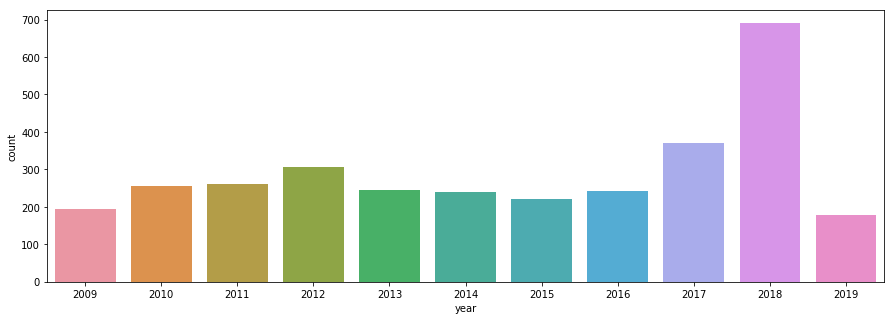

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.countplot(df["year"])
plt.show()
#you can analyze trend of publication by year

TED talks appearantly broadcast more videos on 2018 than anytime. Considering we are on February 2019, 2019 may have higher videos than 2018

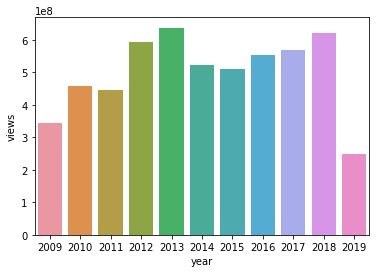

In [67]:
sns.barplot(x= df.groupby(["year"]).sum()["views"].index, y= df.groupby(["year"]).sum()["views"])
#we can find the views per year

TED talks are watched the most on 2013, combining those two last graphs, we may conclude that an avarage video on 2013 was watched more than an avarage video on 2018

## Talk contents: 

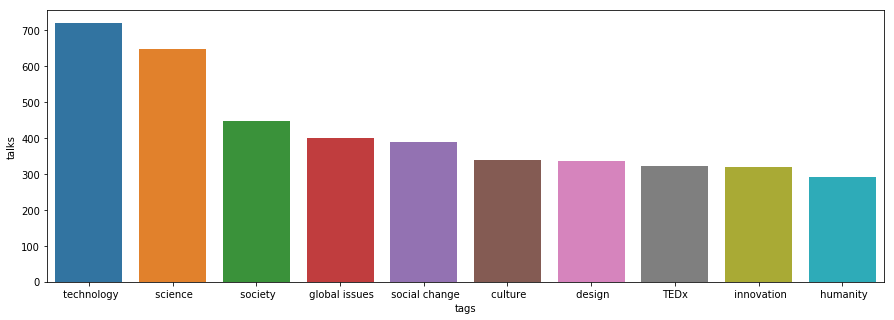

In [70]:
tags = []
for i in range(len(df.loc[:,'tags'])):
    ls = list(df.loc[:,'tags'])[i][2:-2].split(',')
    for c in range(len(ls)):
        value= list(df.loc[:,'tags'])[i][2:-2].split(',')[c]
        tags.append(value.replace("'",""))
tags = pd.DataFrame(tags,columns=["tags"])
tags.iloc[:,0].value_counts().head(10)
tags = pd.DataFrame(tags.iloc[:,0].value_counts()).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x=tags["index"].head(10),y=tags["tags"].head(10))
plt.xlabel("tags")
plt.ylabel("talks")
plt.show()

#you can analyze talk-topics

Technology is the most talked topic, followed by Science and Society

### 5.Conclusion

1. We have list of !!!! talk links saved as csv file in our computer. We can easily increase number of talks we want to scrape, or we can decide to scrape the oldest videos with these codes.
2. We succeeded to have a csv file of datas of !!! TED talks. 
3. Those datas are classified as author, title, keywords, description, date, duration, views,and url. 
4. We can basically see descriptions of each column: mean of the duration, most talked author etc.
5. We can see:
    <bn> 
        most viewed talks
    <bn> 
        the distribution of tags (all times or by year)
    <bn> 
        The trend of publication by TED

What can be done further? 
    <bn>
    
    Ted has speakers occupation data on the video page.
    We can see the pattern of occupations during time or the correlations between occupations and contents. 
    
   <bn>
    
    Secondly, Ted has the suggested videos part and the description of those videos. We can analyze the pattern on suggestions. Is it based on speakers, year, or tags?
